In [31]:
#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
import scipy.io as sio
import scipy.fftpack as sc

#No tenemos zplane declara da con lo cual directamnete ubicamos esta implementacion en stackoverflow.
# No ta buscar si hau algo maejor documentado
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

def simple_fft(yy,fs,N):
    """
    brief:  Genera la DFT, pero utilizando la FFT como algoritmo
    Entradas
    yy: Señal de entrada a realizar una DFT
    ts: Tiempo de sampleo en segundos
    N:  Numero de muestras de la señal
    
    Salidas
    ff: Campo de las frecuencias para poder hacer un grafico
    XX: Espectro de la señal en valor absoluto y solo una mitad.    
    """
    
    delta_f = (fs/2)/(N//2) ;
    
    XX = (2/N)*np.abs(sc.fft(yy));
    XX = XX[0:N//2];
    ff = np.linspace(0,(fs/2)-delta_f,N//2);
     
    return ff,XX

### Promediador
 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N=2, Para N = 3

Ceros del numerador=[-1.]


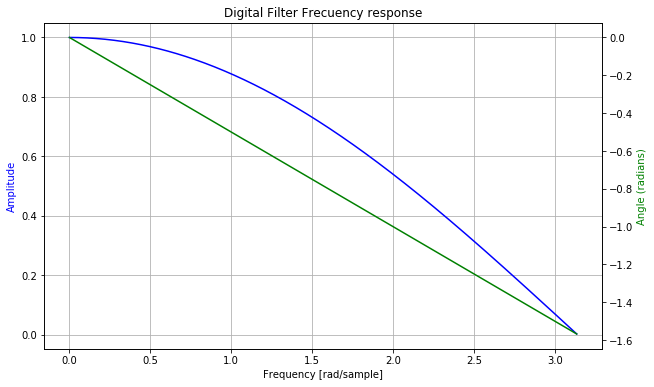

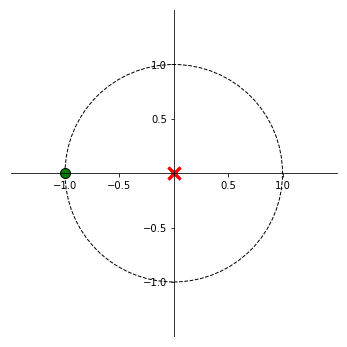

512


In [69]:
#N = 2 Filtro promediador
N = 2
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)

#Como es un FIR el denominador para freqz es 1.
a = np.zeros(N)
a[0] = 1

#Como es un FIR el denominador para freqz es 1
a = np.array([1,0,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

### Como se observa graficamentela respuesta en frecuencia
Uno de los principales factores para utilizar la transformada Z es analizar la respuesta en frecuencia utilizando los diagrama de polos y zeros.

La respuesta en frecuencia de una sistema puede calcularse como o sea la DTFT. (Tener en cuenta que no es la DFT)

Tener en cuenta:
* N es el numero de ceros.
* M es el numero de polos.
![13_1.PNG](13_1.PNG)
Si factorizamos utilizando los polos y ceros del denominador y numeros respectivamente.
![13_2.PNG](13_2.PNG)
De esta ecuacion podemos sacar que la respuesta en frecuencia de un sistema discreto que la magnitud de la respuesta en frecuencia es la relacion entre las distancias de los polos y ceros con todos los puntos del circulo unitario. Tener en cuenta que para w los valores tienen sentido de 0 a pi o que es lo mismo que decir de DC a FS/2.
![13_3.PNG](13_3.PNG)
Para el filtro promediador de orden 2. Solo tenemos un cero. que esta ubicado en (-1,0) o en R=1 $\Phi$=-$\pi$
![13_4.PNG](13_4.PNG)
Con este concepto podemos sacar la conclusion que el filtro promediador para w=0 tiene su maxima amplitud y a medida que nos vamos acercando a w=$\pi$ la misma va disminuyendo hasta llegar a 0.
Tener en cuenta que para la fase, se tiene en cuenta el angulo que se forma entre cada singularidad y el punto en cuestion sobre el circulo unitario.

Ceros del numerador=[-0.5+0.8660254j -0.5-0.8660254j]


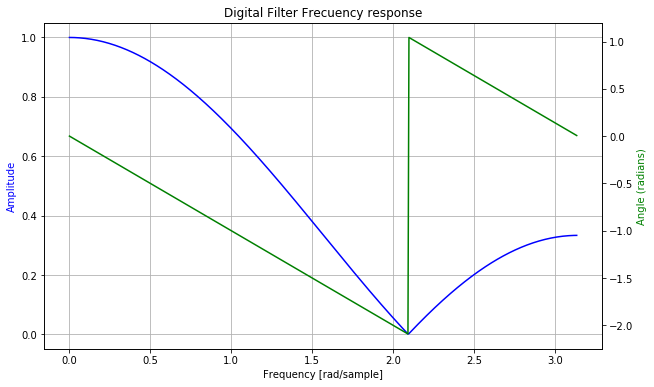

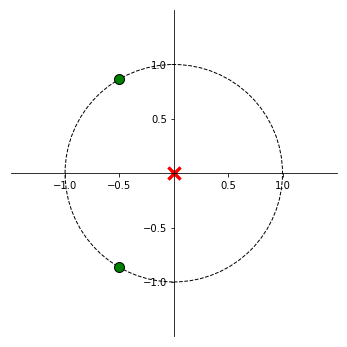

In [17]:
#N = 3 Filtro promediador
N = 3
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)

#Como es un FIR el denominador para freqz es 1.
a = np.zeros(N)
a[0] = 1

#Como es un FIR el denominador para freqz es 1
a = np.array([1,0,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

#Una funcion para calcular las raices del denominador
print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

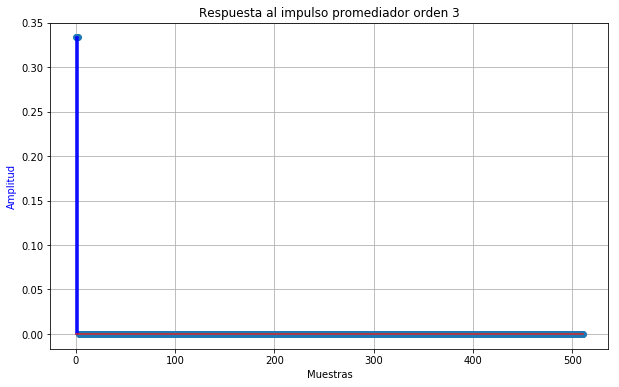

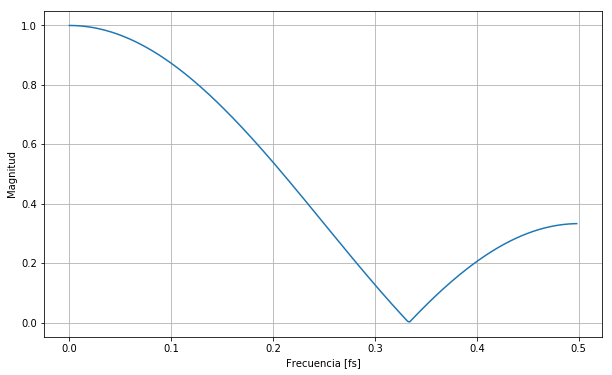

In [130]:
#Calculemos la respuesta al impulso de un sistema
fs = 1.
N  = 3
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)

#Como es un FIR el denominador para freqz es 1.
a = np.zeros(N)
a[0] = 1

#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dimpulse((b,a,fs),n=512)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout, np.squeeze(yout), 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()


t    = np.squeeze(tout)
yout = np.squeeze(yout)

fft_out =  np.fft.fft(yout)
freq    =  np.fft.fftfreq(t.shape[-1])

#Le pusimos muchos puntos para tener un DFT con mucho puntos y tener resolucion
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(freq[0:256],np.abs(fft_out[0:256]))
ax.set_xlabel("Frecuencia [fs]")
ax.set_ylabel("Magnitud")
ax.grid()

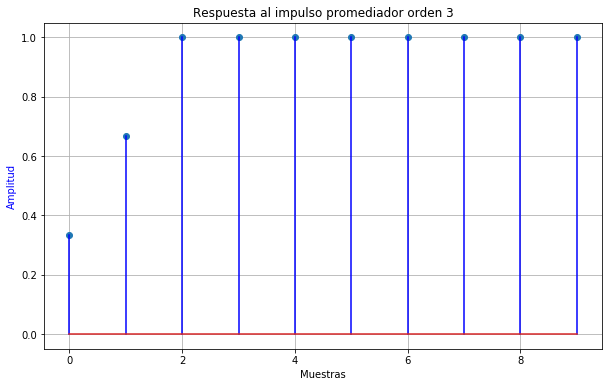

In [75]:
# Como para mostrar aunque es mas util para control la respuesta al escalon
# Calculemos la respuesta al impulso de un sistema
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.dstep.html
fs = 1.
N  = 3
#Numerador del Filtro FIR
b = (1/N)*np.ones(N)

#Como es un FIR el denominador para freqz es 1.
a = np.zeros(N)
a[0] = 1

#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dstep((b,a,fs),n=10)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout, np.squeeze(yout), 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()

Como la respuesta al impulso en el tiempo es un escalon la respuesta en frecuencia es una sinc.
El roll-off de este filtro es muy lenta. Claramente el filtro promedidor no puede separar una banda de frecuencia de o0tra.

La arquitectura de esta filtro es muy simple de implementar.
![13_5.PNG](13_5.PNG)


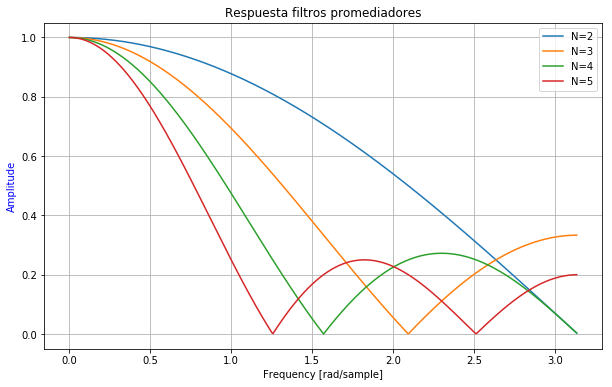

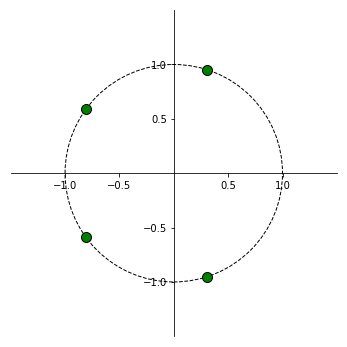

In [102]:
#Vamos a calcular la transferencia para el filtro promediador yendo de N=2 a N=5
#Numerador del Filtro FIR
a = 1.
result_list = []
for n in np.arange(2,6):
    result_list.append(signal.freqz((1./n)*np.ones(n),a))

w = result_list[0][0]
h_vector = [np.abs(item[1]) for item in result_list]

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta filtros promediadores')
for i,item in enumerate(h_vector):
    ax1.plot(w, item)
ax1.legend(["N=2","N=3","N=4","N=5"])
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.grid()

#dibujamos la respuesta en frecuencia para N=5
fig = plt.figure(figsize=(10,6))
z,p,k=zplane((1./5)*np.array([1,1,1,1,1]),1.)

### Diferenciador

Ceros del numerador=[1.]


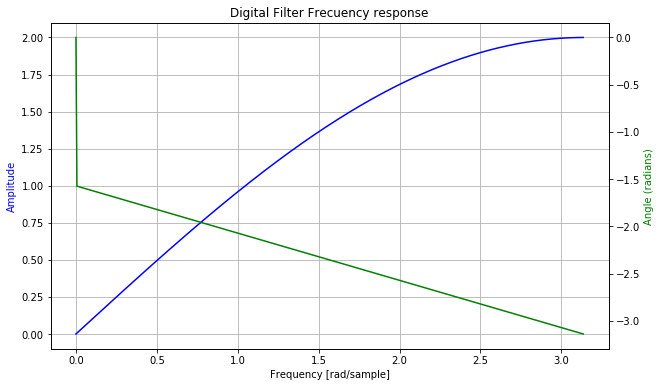

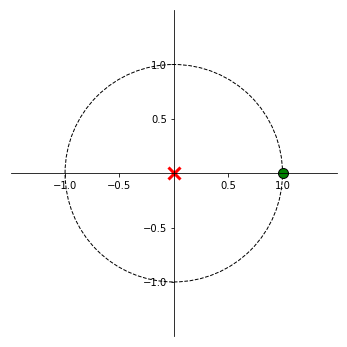

In [105]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Filtro Pasaaltos
b = np.array([-1,1])
#Como es un FIR el denominador para freqz es 1
a = np.array([1,0])
#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize = (10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Ceros del numerador={}".format(np.roots(b)))
plt.show()

#Dibujamos el diagrama de polos y zeros, recordar que tiene 

fig = plt.figure(figsize = (10,6))
z,p,k=zplane(b,a)

### Sistema con realimentacion simple
 $$ y(n) =  x(n) + \alpha .y(n)  $$

Polos del denominador=[1.2]


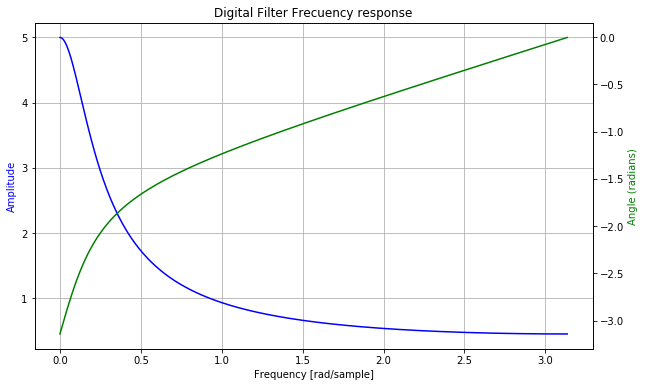

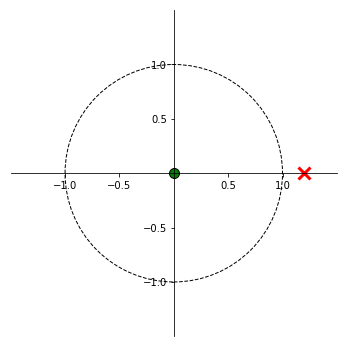

In [145]:
#Probemos una transferencia con polos Y(n) = x(n) + 0.8 y(n-1)
# Con alfa igual a 1.2
alpha = 1.2
b = [1. ,0.]
a = [1. ,-alpha]

w , h = signal.freqz(b,a)


#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Polos del denominador={}".format(np.roots(a)))
plt.show()

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)


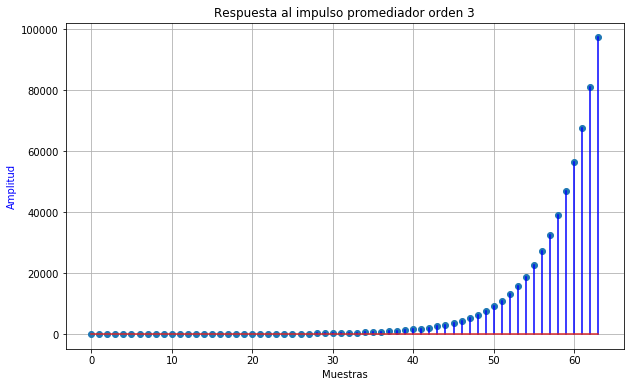

In [144]:
fs = 1.
#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dimpulse((b,a,fs),n=64)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.stem(tout, np.squeeze(yout), 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()
fig.show()

### Ejemplo polos complejos conjugados
 $$ y(n) =  x(n) + y(n-1) - 0.5 y(n-2)  $$

Polos del denominador=[0.5+0.5j 0.5-0.5j]


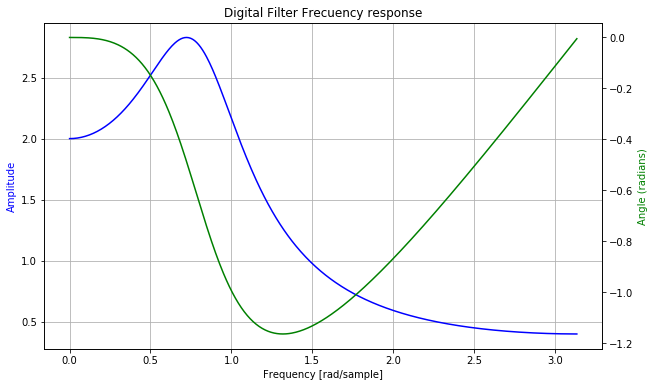

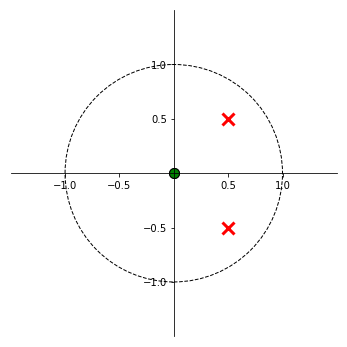

In [153]:
b = [1.,0.,0.]
a = [1.,-1,0.5] 


w , h = signal.freqz(b,a)


#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
#ax2.grid()
ax1.axis('tight')

print("Polos del denominador={}".format(np.roots(a)))
plt.show()

fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

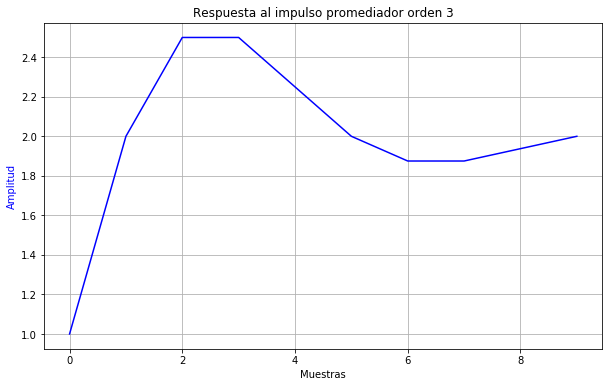

In [154]:
#Utilzamos la funcion impulse de Python
#https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.impulse.html
tout,yout = signal.dstep((b,a,fs),n=10)

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Respuesta al impulso promediador orden %0d' %(N) )
ax1.plot(tout, np.squeeze(yout), 'b')
ax1.set_ylabel('Amplitud', color='b')
ax1.set_xlabel('Muestras')
ax1.grid()